# **Pandas 를 활용한 데이터 분석**
**[Markdown Wiki](https://ko.wikipedia.org/wiki/%EC%9C%84%ED%82%A4%EB%B0%B1%EA%B3%BC:TeX_%EB%AC%B8%EB%B2%95)** | **[Markdown Editor](http://www.hostmath.com/)**

$$ x = \dfrac{-b \pm \sqrt{b^2 - 4ac}}{2a} $$

## **1 일간 변동률 히스토그램 비교**
- 분석결과 상승과 하락비율은 정규분포와 유사한 형성하고 있다
- 정규분포와 비교하면 중심이 두텁다 (급첨 분포 : leptokurtic)
- 정규분포와 비교하면 양쪽 꼬리는 더 두텁다 (팻 테일 : fat tail)
$$ R_{t} (오늘 변동률) = \Bigg(\dfrac{ R_{t}(오늘 종가) - R_{t-1}(어제 종가)}{R_{t-1}(어제 종가)}\Bigg) \times 100$$

In [1]:
from FinanceDataReader import DataReader as fdr
samsung = fdr('005930', '19980101')
data_dict['samsung'] = samsung_dpc
samsung_dpc = (samsung['Close']-samsung['Close'].shift(1)) / samsung['Close'].shift(1) * 100
samsung_dpc.iloc[0] = 0
msft_dpc = (msft['Close']-msft['Close'].shift(1)) / msft['Close'].shift(1) * 100
msft_dpc.iloc[0] = 0

CPU times: user 1.65 s, sys: 851 ms, total: 2.5 s
Wall time: 4.77 s


found : D2Coding


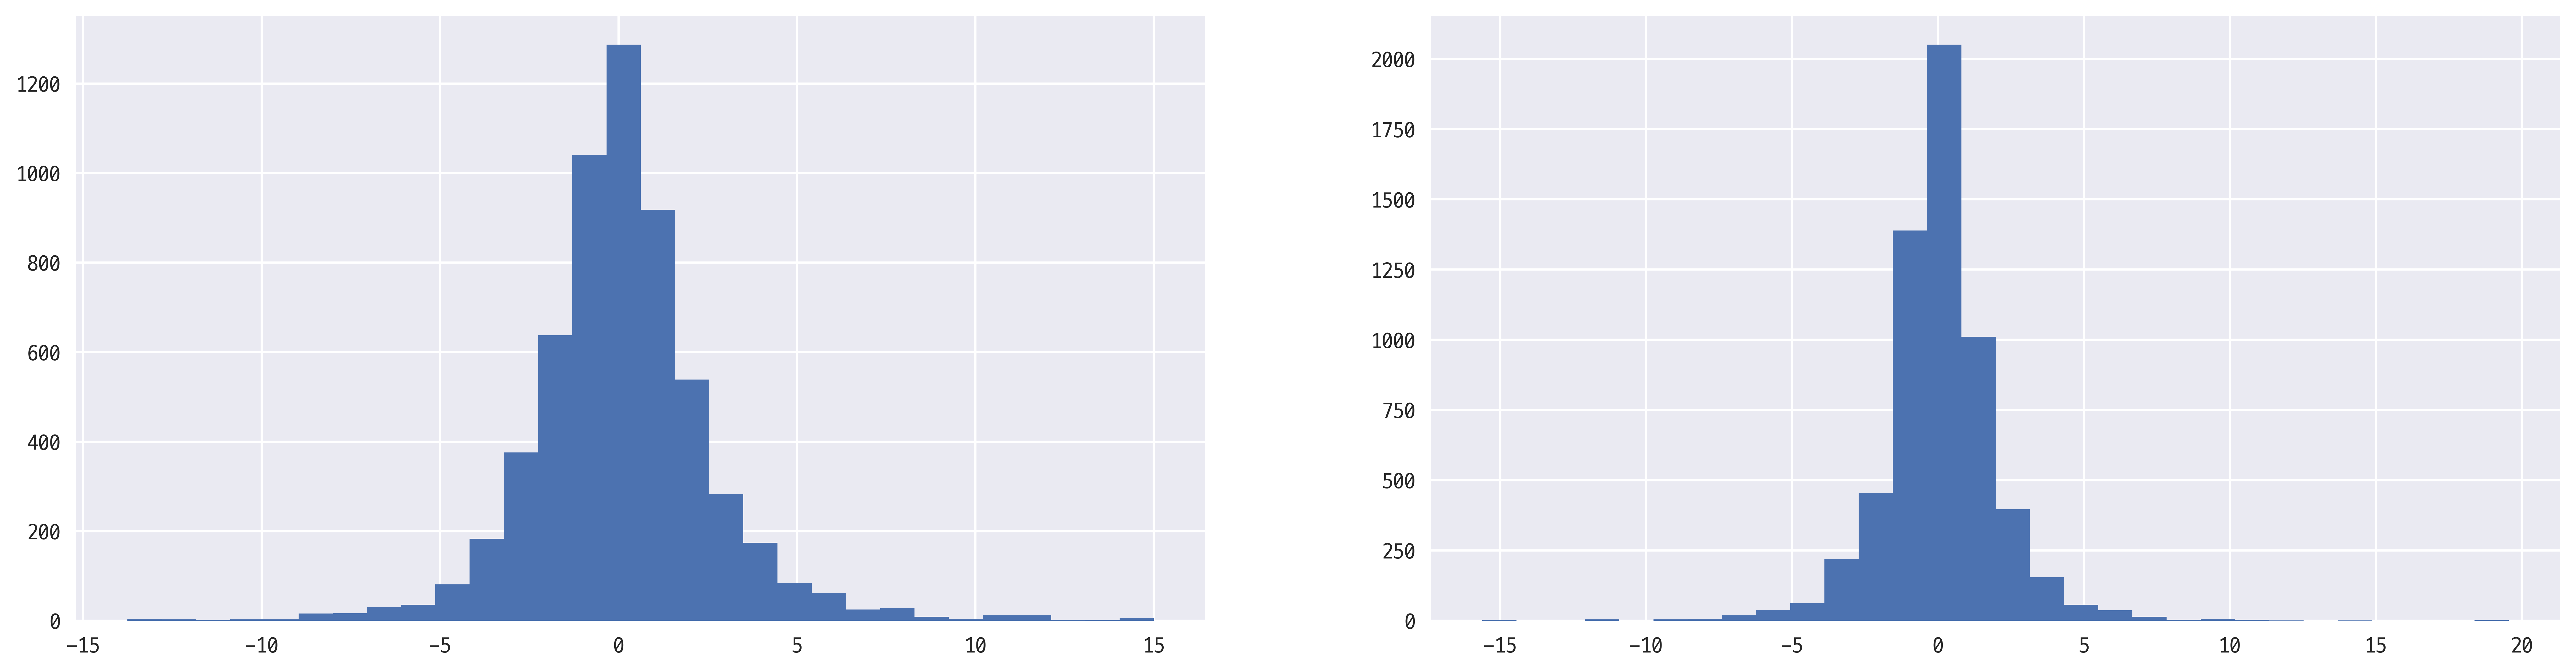

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from data.finance import Initialized
Initialized().ploting()

bin_number = 30
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (20.0, 5.0)
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.hist(samsung_dpc, bins=bin_number)
ax2.hist(msft_dpc, bins=bin_number)
plt.grid(True); plt.show()

## **2 일간 변동률 누적합 비교**
변동의 누적적인 변화를 비교하려면 누적합(Cumulative Sum) 을 계산해야 한다

In [3]:
%%time
samsung_dpc = (samsung['Close']-samsung['Close'].shift(1)) / samsung['Close'].shift(1) * 100
samsung_dpc.iloc[0] = 0
samsung_dpc_cs = samsung_dpc.cumsum() # 누적합 Series 생성하기

# msft_dpc = (msft['Close'] / msft['Close'].shift(1)-1) * 100
msft_dpc = (msft['Close']-msft['Close'].shift(1)) / msft['Close'].shift(1) * 100
msft_dpc.iloc[0] = 0
msft_dpc_cs = msft_dpc.cumsum()

CPU times: user 3.44 ms, sys: 1.03 ms, total: 4.48 ms
Wall time: 3.07 ms


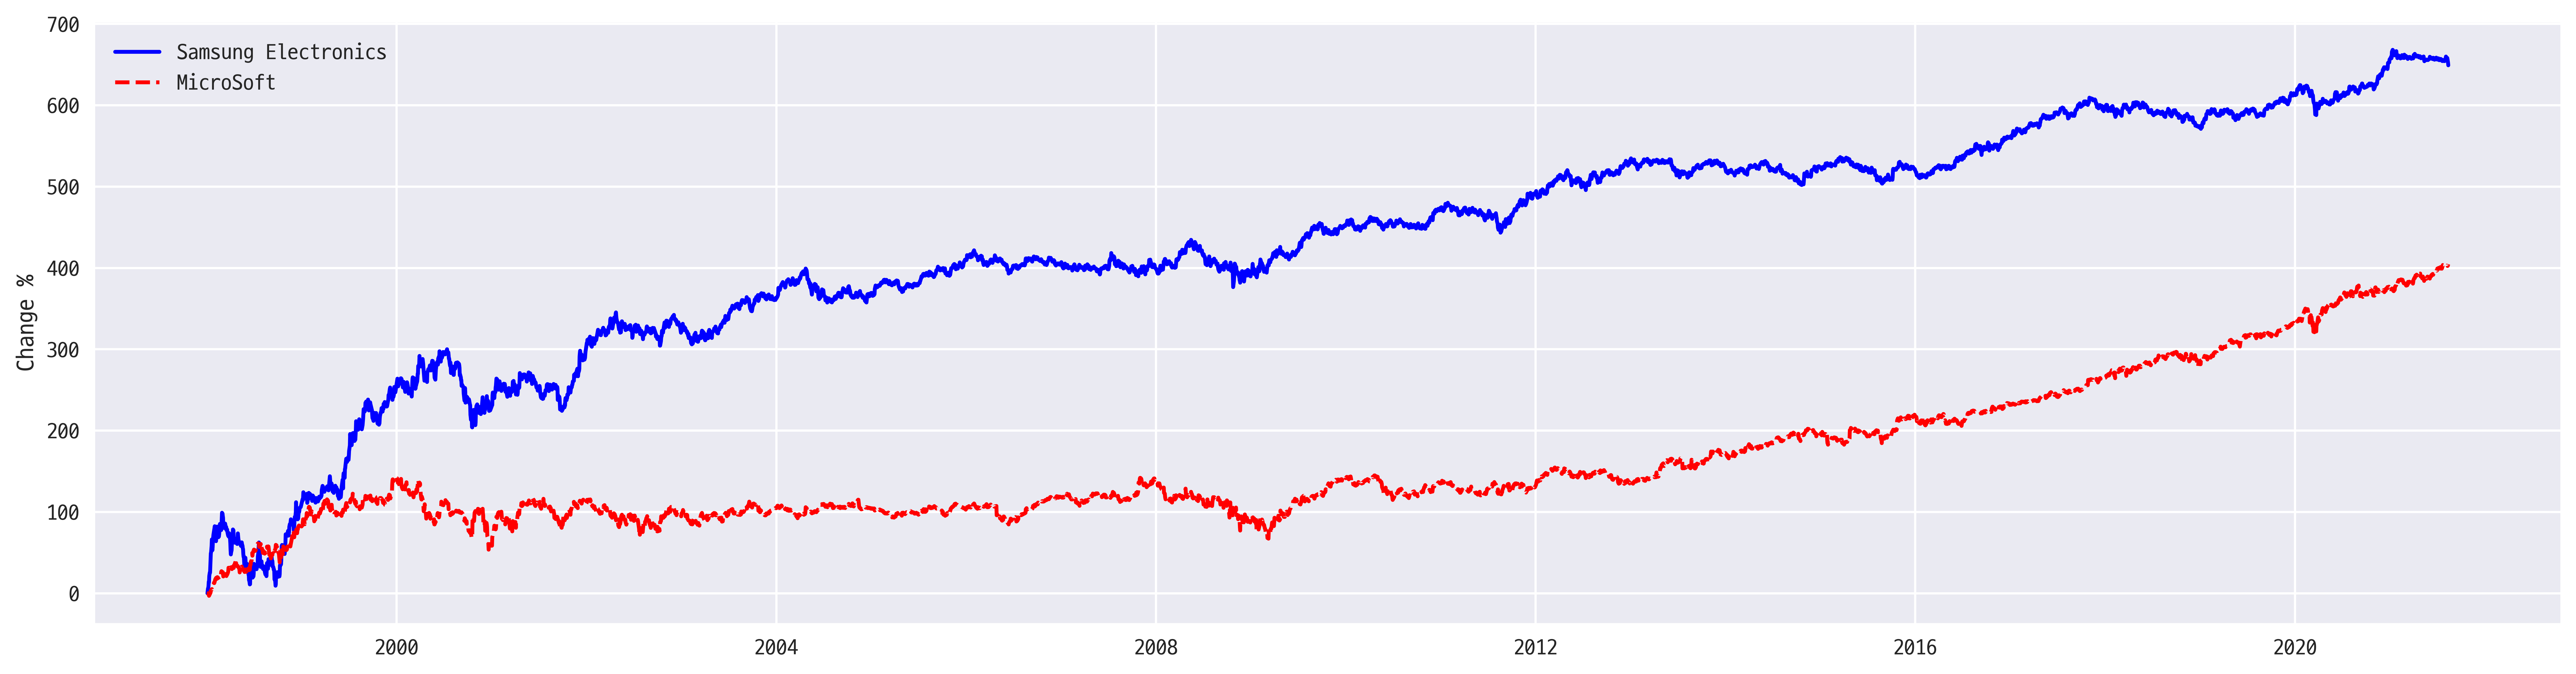

In [4]:
# Visualization
plt.plot(samsung_dpc_cs, 'b', label="Samsung Electronics")
plt.plot(msft_dpc_cs, 'r--', label="MicroSoft")
plt.ylabel("Change %")
plt.grid(True)
plt.legend(loc='best')
plt.show()

## **3 최대 손실낙폭**
- Maximum Drawdown(최대 손실 낙폭)은 특정기간 최대 손실값을 비교하는 분석방법 입니다
- Quant 투자에서는 수익률 보다 MDD 를 낮추는 것이 더 중요하다
$$ MDD = \frac{최저점 - 최고점}{최저점} $$

## **01 Kospi 가격데이터를 활용**

In [5]:
DATA_FILENAME = 'data/stock-ks11.pkl'

# https://aroussi.com/post/python-yahoo-finance
import pandas as pd
from FinanceDataReader import DataReader as fdr
try:
    kospi = pd.read_pickle(DATA_FILENAME)
except FileNotFoundError:
    kospi = fdr('KS11', "19820101")
    kospi.to_pickle(DATA_FILENAME)
kospi.head(3)

Close    Open    High     Low     Volume  Change
Date                                                         
1982-01-04  123.60  123.60  123.60  123.60   413000.0 -0.0586
1982-01-05  121.66  121.66  121.66  121.66   697000.0 -0.0157
1982-01-06  125.80  125.80  125.80  125.80  1180000.0  0.0340

In [6]:
# 연간(분기) 기준 최대 손실낙폭 계산하기
window = 252 # 1년간 거래일수
peak = kospi['Close'].rolling(window, min_periods=1).max() # 연간최저치 배열
drawdown = kospi['Close'] / peak - 1.                      # 종가와 연간최저치 Gap 배열
drawdown_max = drawdown.rolling(window, min_periods=1).min() # 종가 대비 연간최저치 Gap 이동평균 배열

# 최저구간 계산으로 확인하기
drawdown_max_series = drawdown_max[drawdown_max == drawdown_max.min()]
drawdown_max_series.unique()[0], len(drawdown_max_series), drawdown_max_series.index, 

(-0.6340204164324833,
 252,
 DatetimeIndex(['1998-06-16', '1998-06-17', '1998-06-18', '1998-06-19',
                '1998-06-20', '1998-06-22', '1998-06-23', '1998-06-24',
                '1998-06-25', '1998-06-26',
                ...
                '1999-05-07', '1999-05-10', '1999-05-11', '1999-05-12',
                '1999-05-13', '1999-05-14', '1999-05-17', '1999-05-18',
                '1999-05-19', '1999-05-20'],
               dtype='datetime64[ns]', name='Date', length=252, freq=None))

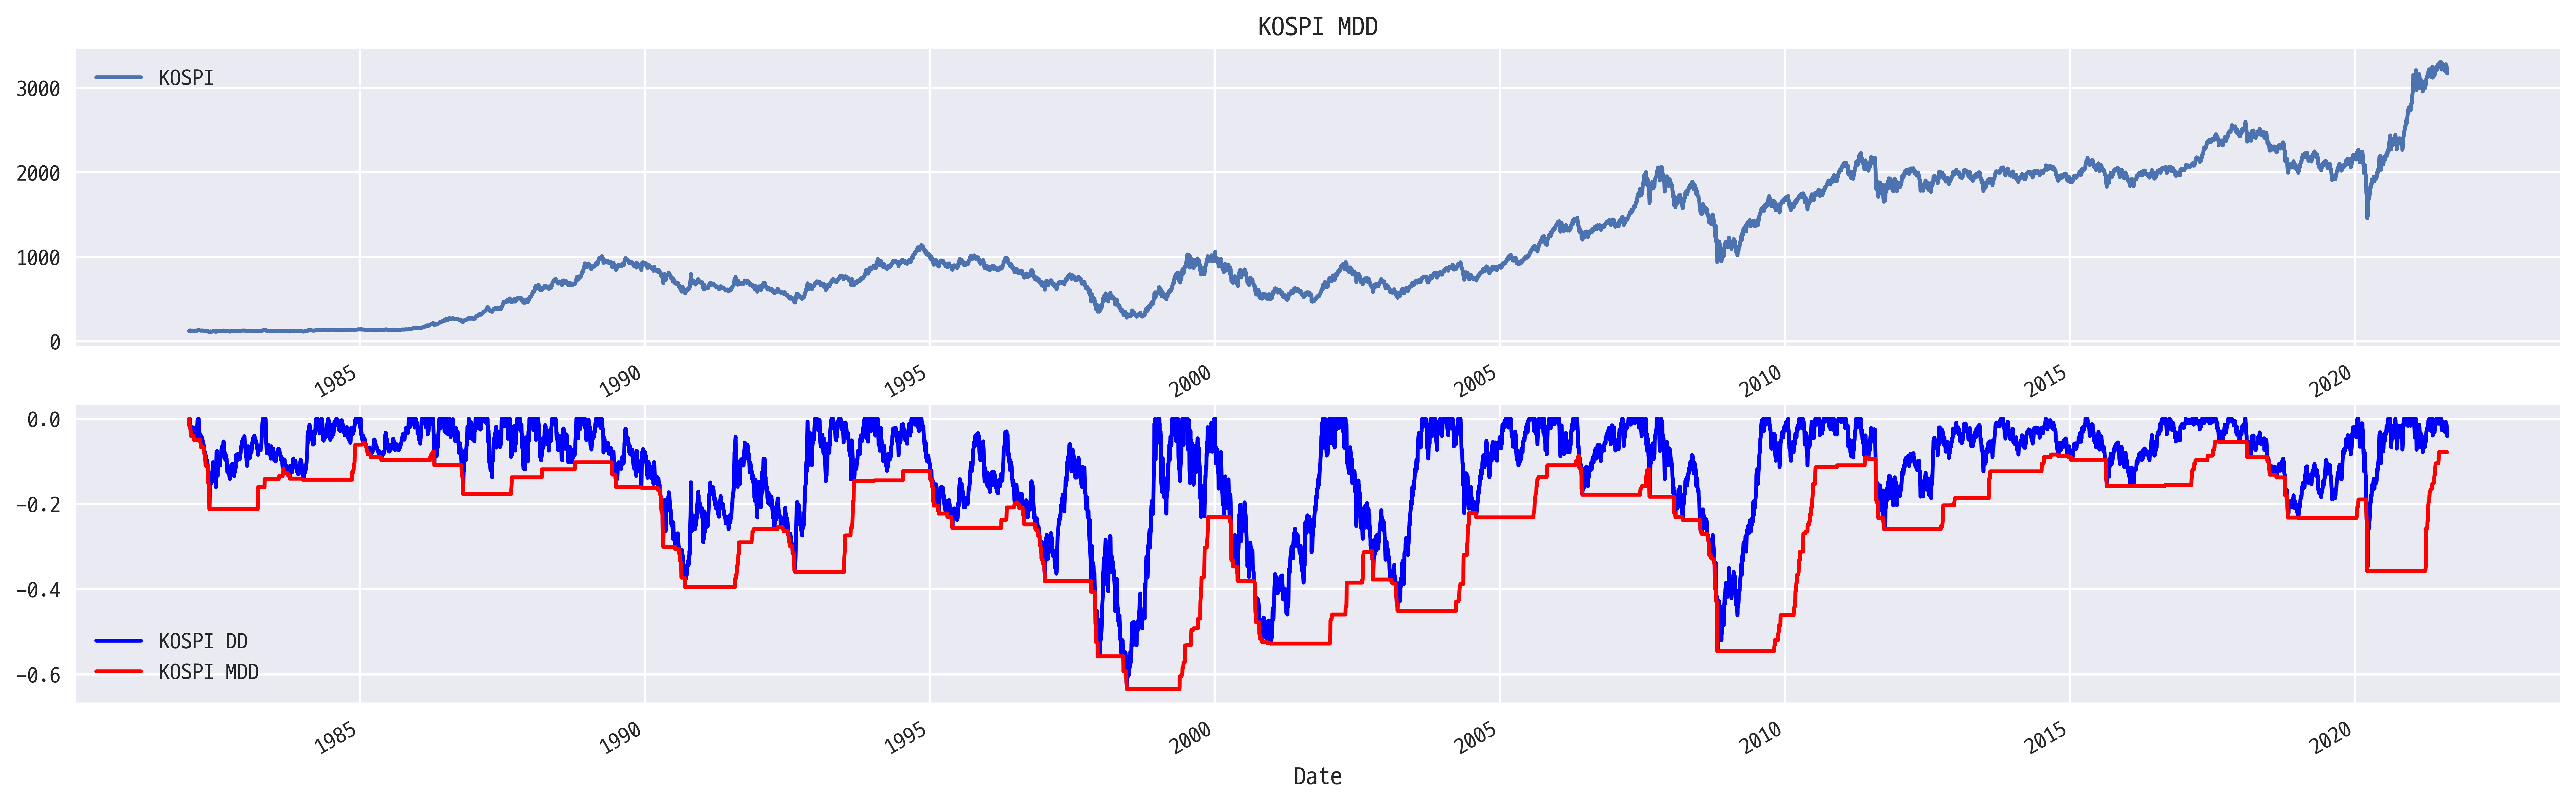

In [7]:
# Visualization
plt.rcParams['figure.figsize'] = (20.0, 6.0)
plt.subplot(211) # 2행 1열중, 1행에 그린다
kospi['Close'].plot(label="KOSPI", title="KOSPI MDD", grid=True, legend=True)
plt.subplot(212) # 2행 1열중, 2행에 그린다
drawdown.plot(c="blue", label="KOSPI DD", grid=True, legend=True)
drawdown_max.plot(c="red", label="KOSPI MDD", grid=True, legend=True)
plt.show()

<br />

## **02 Dow 지수 가격데이터를 활용**
- https://aroussi.com/post/python-yahoo-finance

In [8]:
DATA_FILENAME = 'data/stock-dji.pkl'

# Loading the dataset
import yfinance as yf
try:
    dow = pd.read_pickle(DATA_FILENAME)
except FileNotFoundError:
    dow = yf.Ticker("DJI")
    dow = dow.history(period="max", start='1982-01-04')
    dow.to_pickle(DATA_FILENAME)
dow.head(3)

Open        High         Low       Close  Volume  Dividends  \
Date                                                                            
1982-01-04  882.520020  882.520020  882.520020  882.520020       0          0   
1982-01-05  865.299988  865.299988  865.299988  865.299988       0          0   
1982-01-06  861.020020  861.020020  861.020020  861.020020       0          0   

            Stock Splits  
Date                      
1982-01-04             0  
1982-01-05             0  
1982-01-06             0

In [9]:
# 연간(분기) 기준 최대 손실낙폭 계산하기
peak = dow['Close'].rolling(window, min_periods=1).max() # 연간최저치 배열
drawdown = dow['Close'] / peak - 1.                      # 종가와 연간최저치 Gap 배열
drawdown_max = drawdown.rolling(window, min_periods=1).min() # 종가 대비 연간최저치 Gap 이동평균 배열

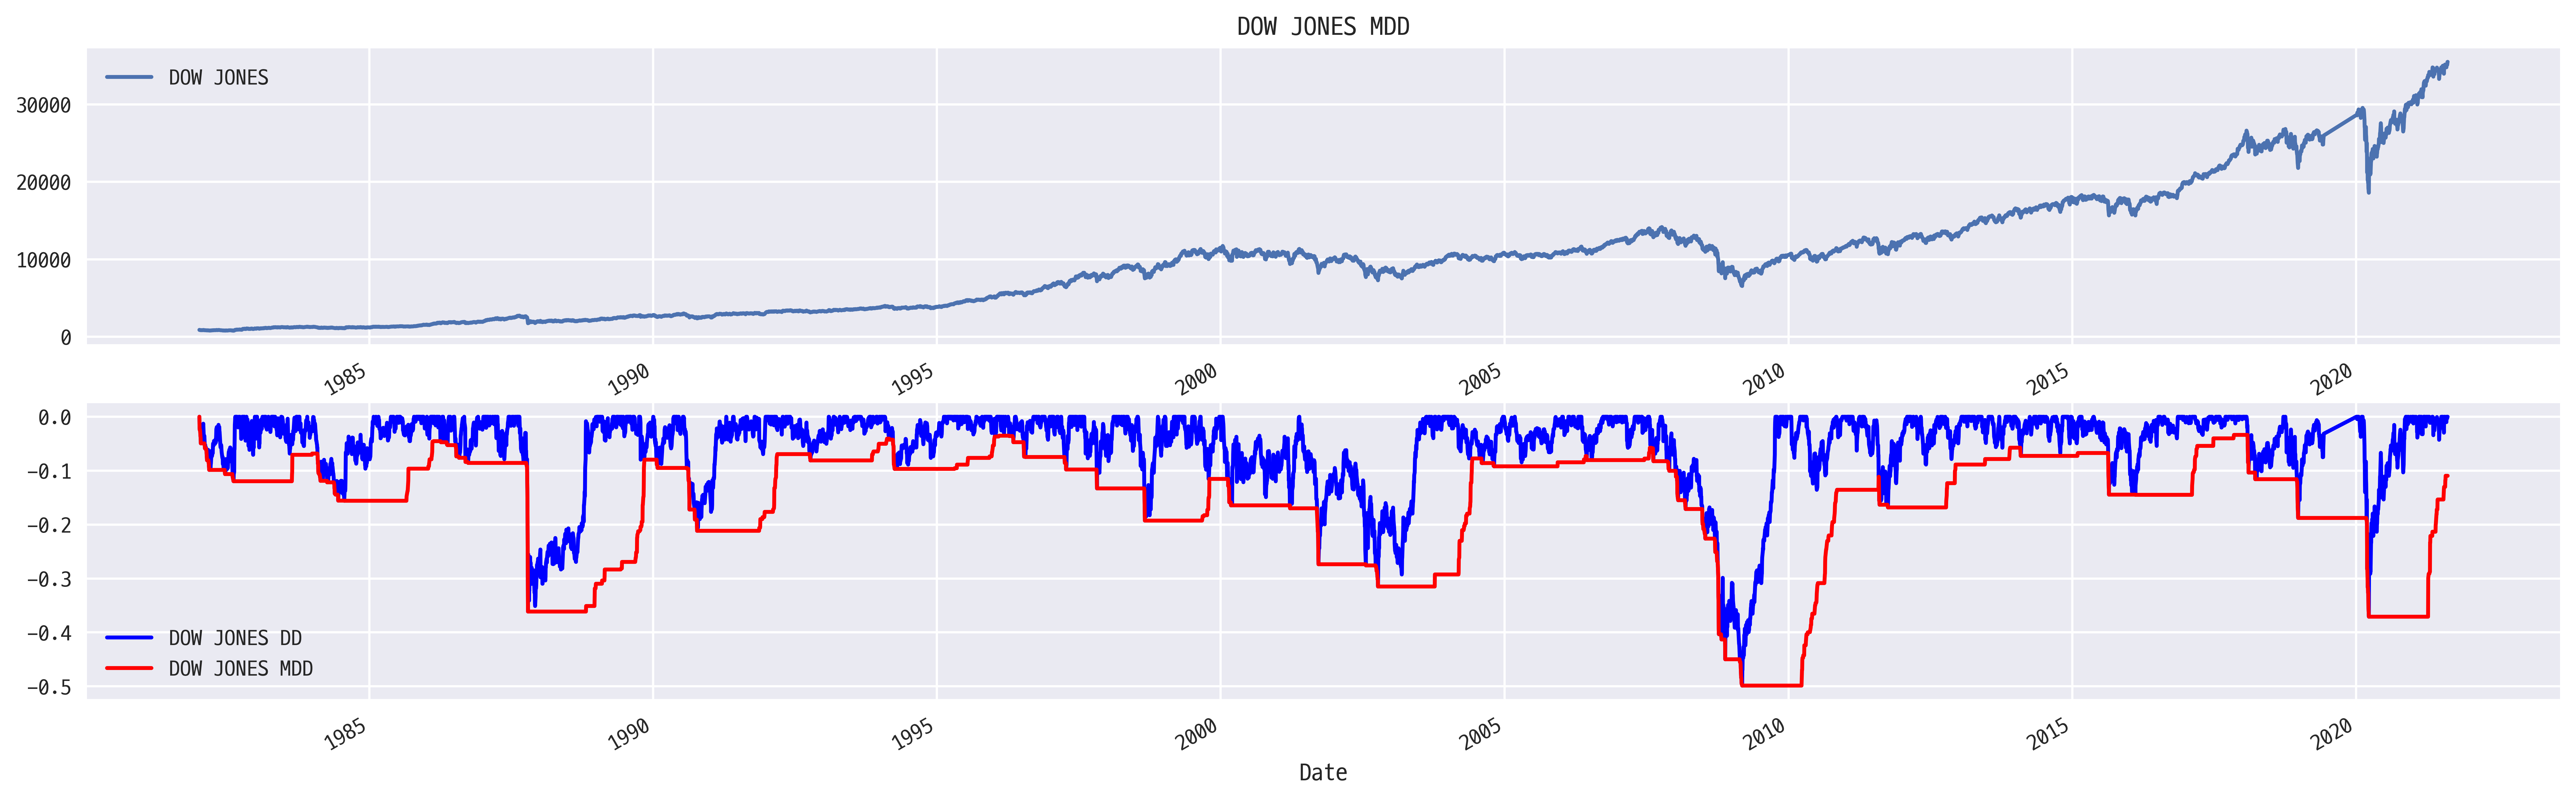

In [10]:
# Visualization
plt.rcParams['figure.figsize'] = (20.0, 6.0)
plt.subplot(211) # 2행 2열중, 1행에 그린다
dow['Close'].plot(label="DOW JONES", title="DOW JONES MDD", grid=True, legend=True)
plt.subplot(212) # 2행 2열중, 1행에 그린다
drawdown.plot(c="blue", label="DOW JONES DD", grid=True, legend=True)
drawdown_max.plot(c="red", label="DOW JONES MDD", grid=True, legend=True)
plt.show()

<br/>

## **4 회귀분석과 상관관계 비교**
- 비교를 위해, 초기값을 1로 일치 시킨다
- Data는 평균으로 회귀할려는 경향이 있다
- Kospi 와 Dow Jones 는 비슷한 추세로 상승함을 볼 수 있다

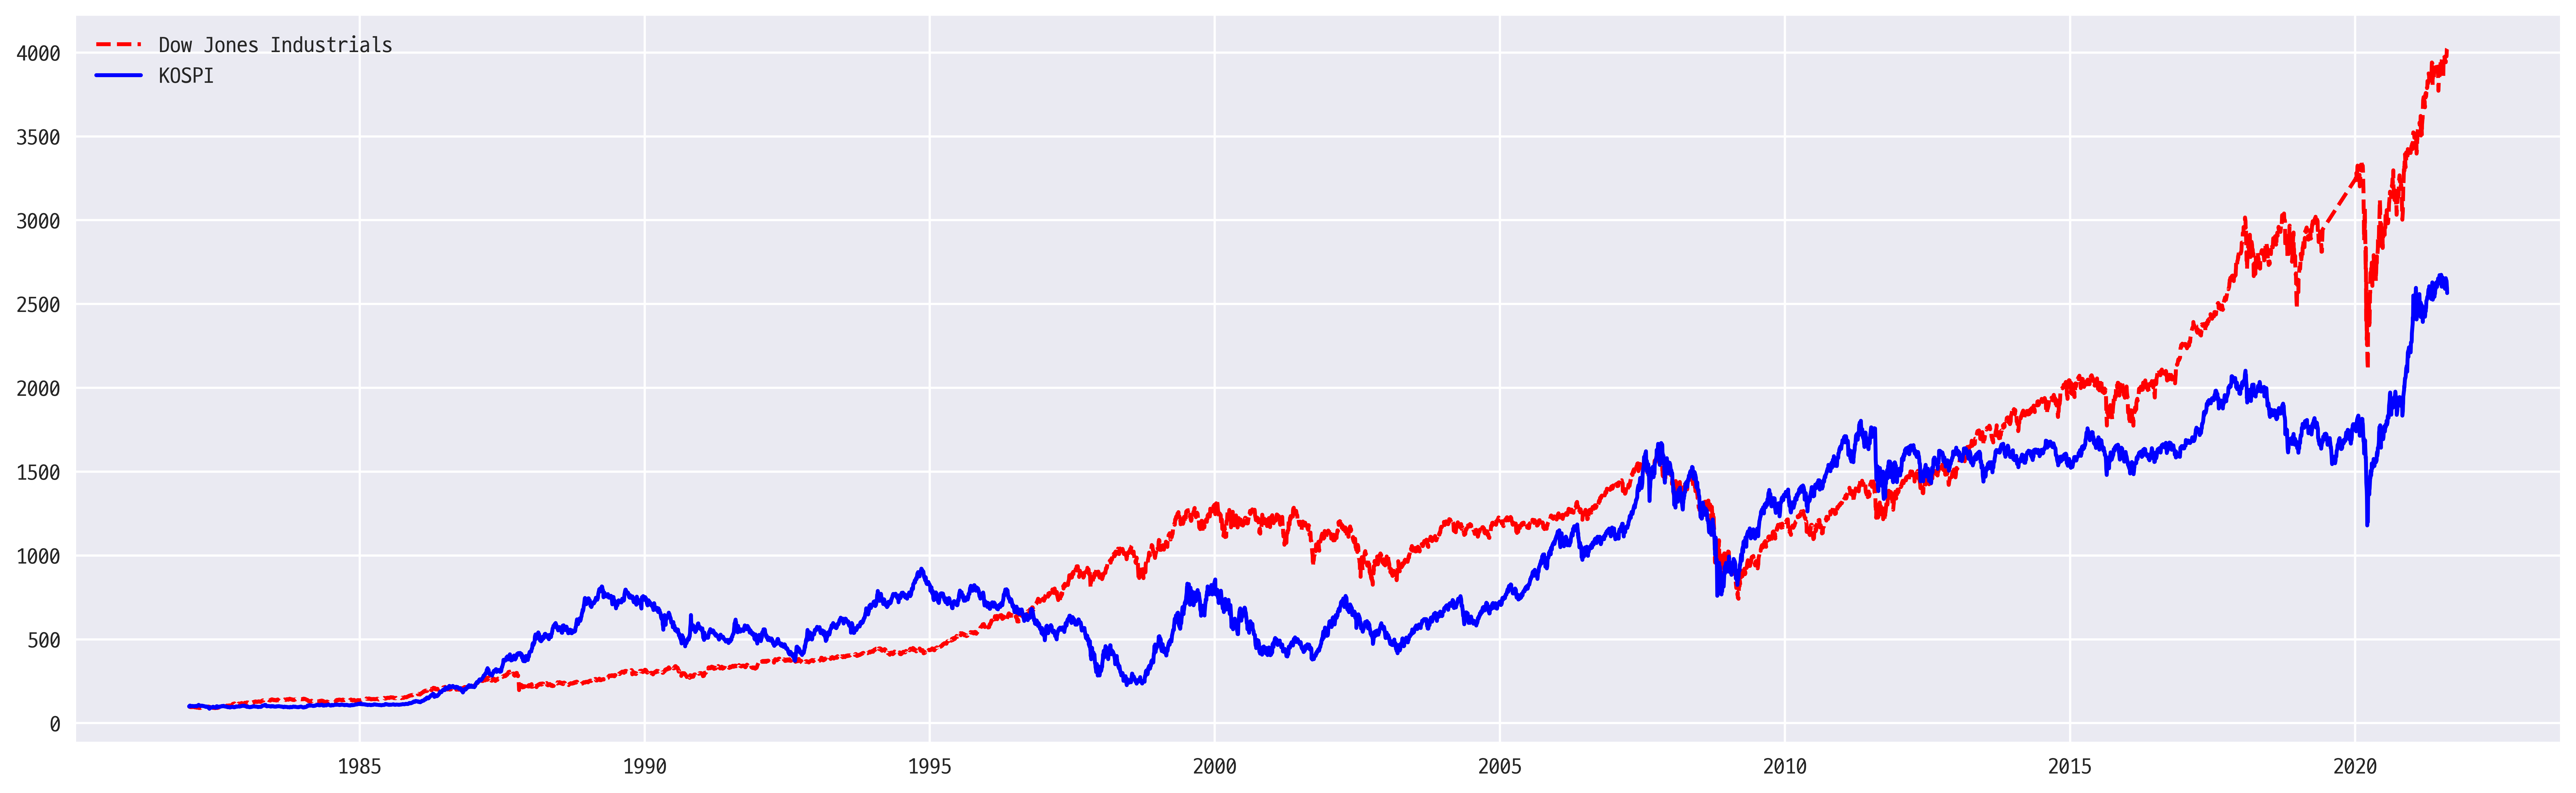

In [11]:
# 지수화 데이터 변환
date_init = dow.index[0].strftime('%Y-%m-%d') # 최초 기준일 데이터 추출
dow_exp = dow.Close / dow.Close[date_init] * 100
kospi_exp = kospi.Close / kospi.Close[date_init] * 100

plt.plot(dow_exp, 'r--', label='Dow Jones Industrials')
plt.plot(kospi_exp, 'b', label="KOSPI")
plt.legend(loc='best'); plt.grid(True); plt.show()

## **5 산점도 분석**
- Data는 평균으로 회귀할려는 경향이 있다
- Kospi 와 Dow Jones 동일기간 비교를 위한 산점도를 그린다
- Kospi 와 Dow Jones 는 비슷한 추세로 상승함을 볼 수 있다

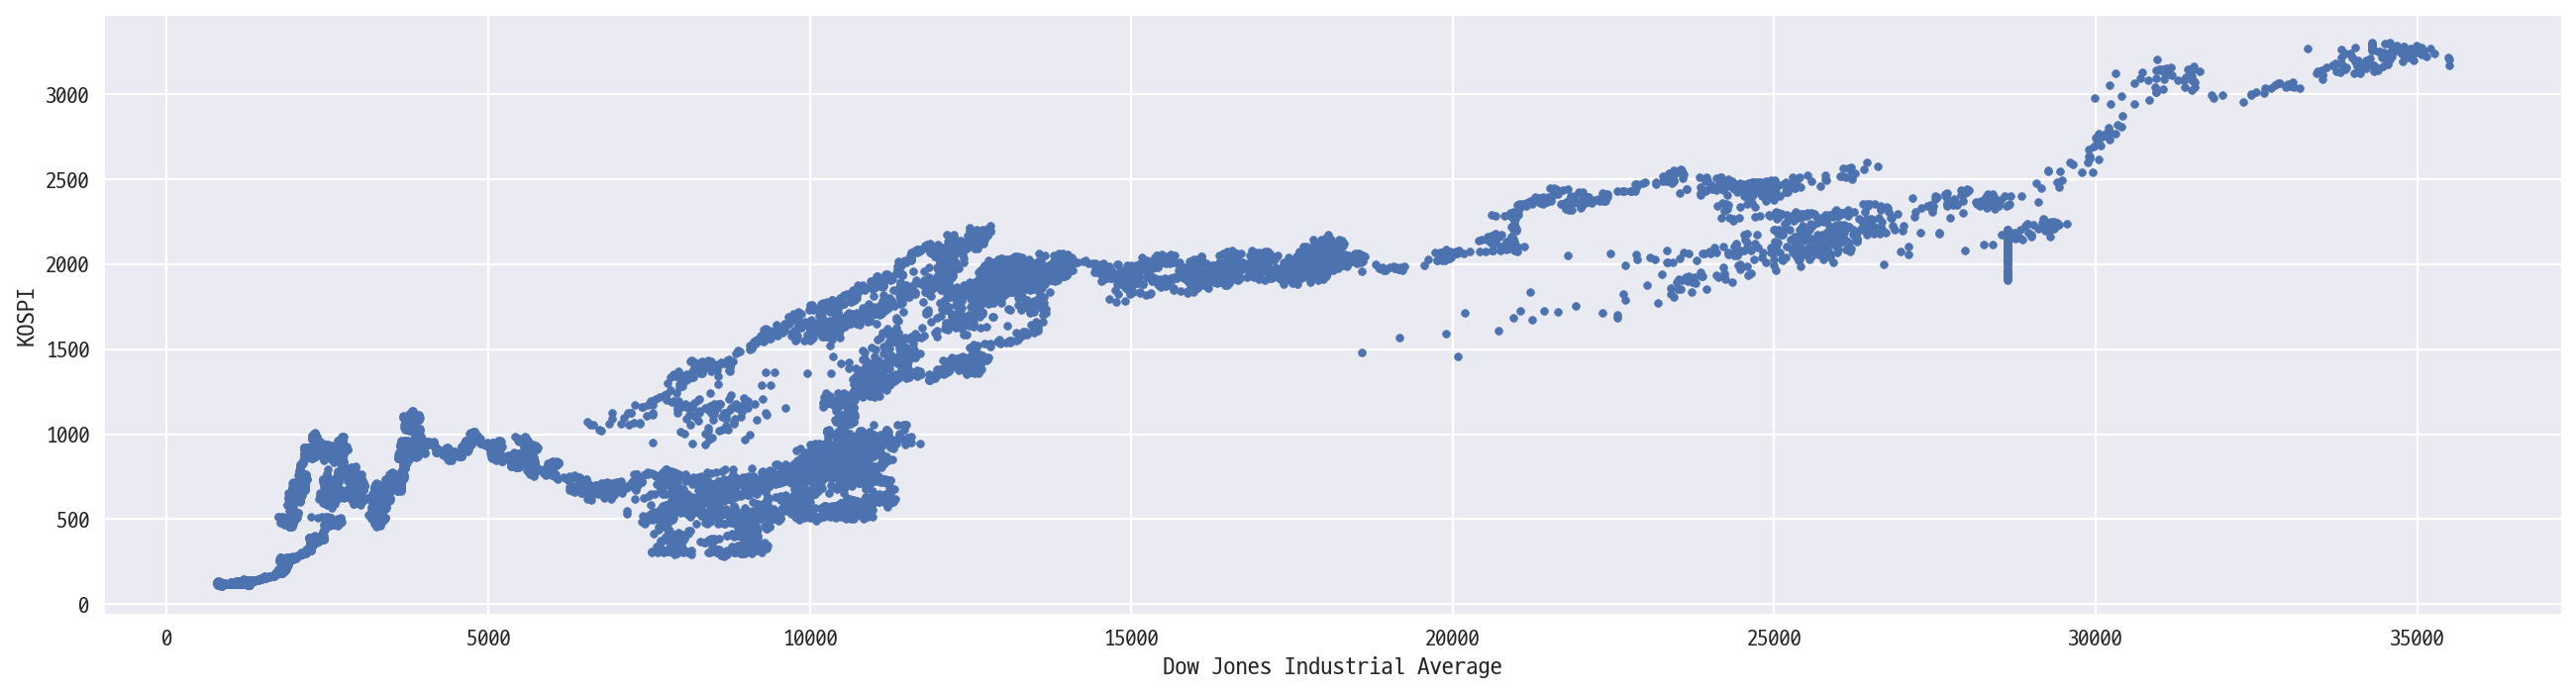

In [12]:
import pandas as pd
table_stock = pd.DataFrame({'DOW': dow.Close, 'KOSPI': kospi.Close})
table_stock = table_stock.fillna(method='bfill')
table_stock = table_stock.fillna(method='ffill')

plt.rcParams['figure.dpi'] = 80
plt.rcParams['figure.figsize'] = (20.0, 5.0)
plt.scatter(table_stock['DOW'], table_stock['KOSPI'], marker='.')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()

## **6 선형 회귀분석**
$Y$ 와 원인이 되는 $X$ 간의 관계를 추정하는 선형 회귀 모델(linear Regression Model)을 분석한다

$$ Y_{i} = \beta_{0} + \beta_{1} X_{i} + \varepsilon_{i}(i = 1,2,...,n) $$
- $Y_{i} $ : i 번째 종속변수의 값
- $X_{i} $ : i 번째 독립변수의 값
- $\beta_{0} $ : 선형 회귀식의 절편 (intercept)
- $\beta_{1} $ : 선형 회귀식의 기울기 (slope)
- $\varepsilon_{i} $ : 오차항 (종속변수 $Y$ 와 실제값 기대치 차이)

In [13]:
# Pandas 를 활용한 상관계수 분석
# NaN 값이 섞여있는 경우, 결과값 추출이 안됨에 유의
# print(table_stock.isna().sum())
r_value = table_stock['DOW'].corr(table_stock['KOSPI'])
r_squared = r_value ** 2
print(f"r_value(상관계수): {r_value}\nr_squared(결정계수): {r_squared}")

r_value(상관계수): 0.8834179122883052
r_squared(결정계수): 0.7804272077518277


In [14]:
# stats 모듈을 활용한 회귀식 추출하기
from scipy import stats
regression = stats.linregress(table_stock.DOW, table_stock.KOSPI)
regression_line = f'Y = {regression.slope:.2f} * X + {regression.intercept:.2f}'
regression_line

'Y = 0.08 * X + 299.36'

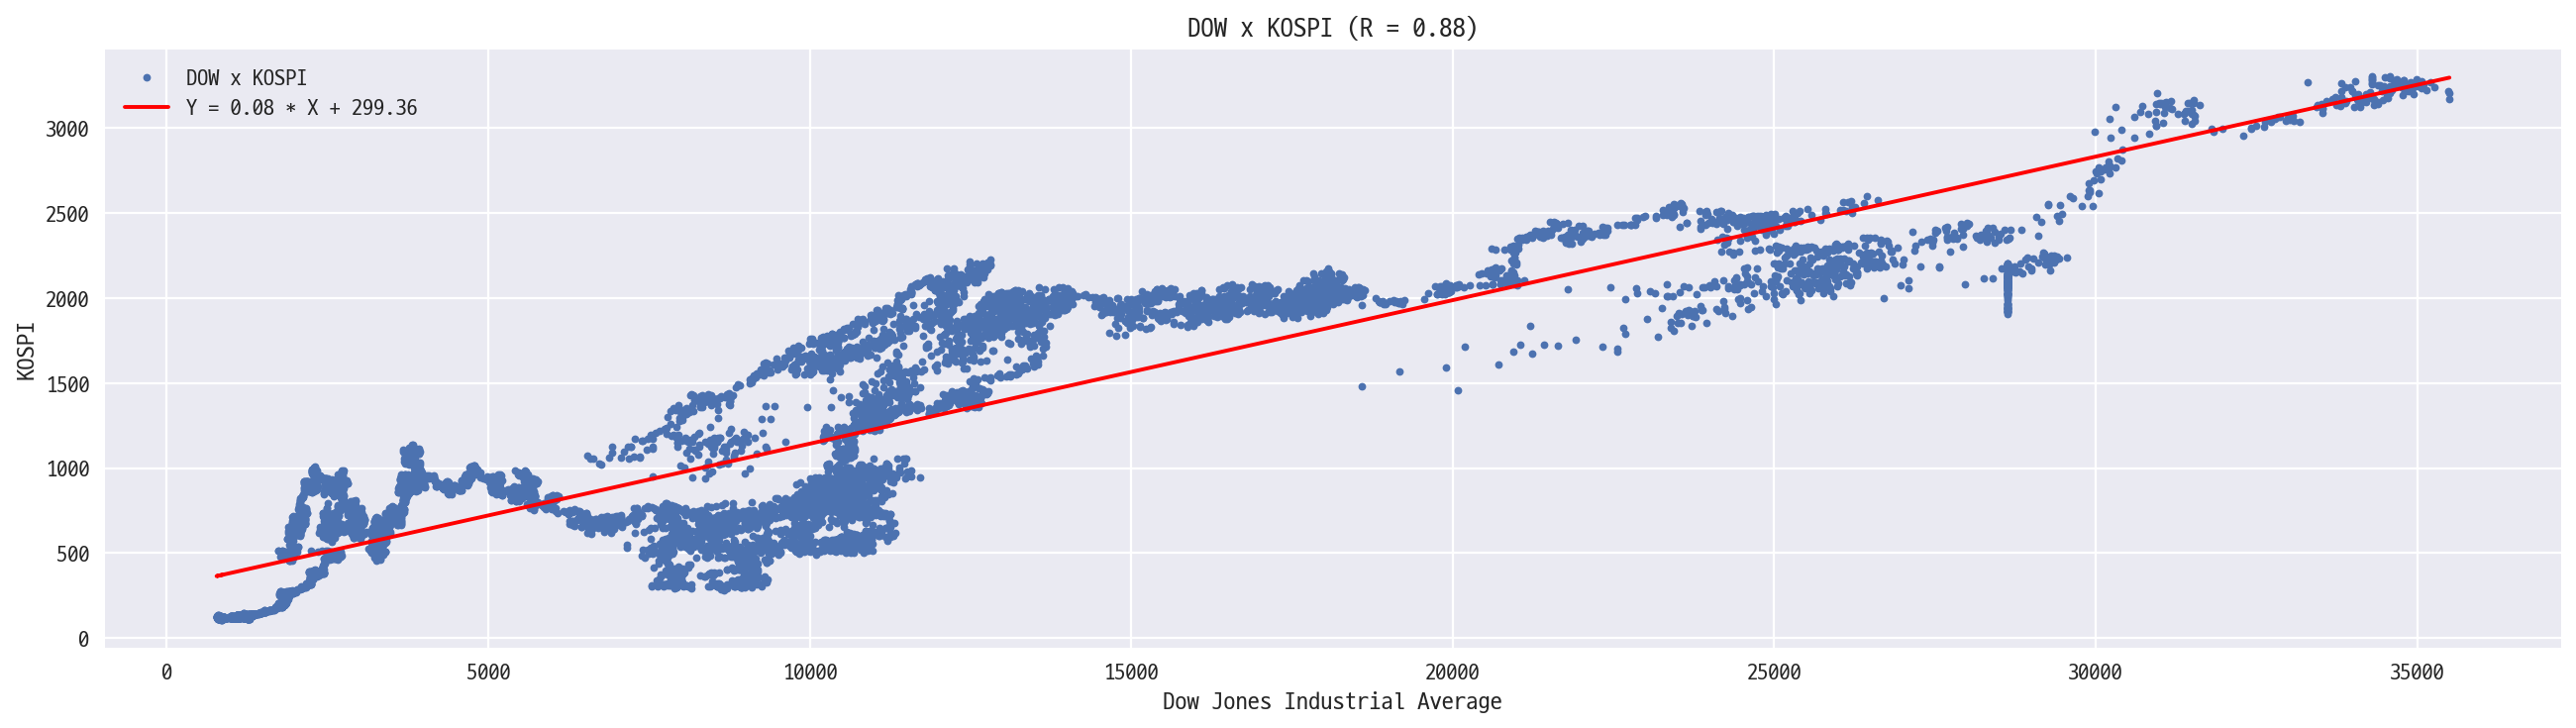

In [15]:
# Visualization
plt.plot(table_stock.DOW, table_stock.KOSPI, '.')
plt.plot(table_stock.DOW, (regression.slope * table_stock.DOW + regression.intercept), 'r')
plt.legend(['DOW x KOSPI', regression_line])
plt.title(f'DOW x KOSPI (R = {regression.rvalue:.2f})')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()